In [19]:
# Elaborar un modelo predictivo utilizando redes neuronales en
# Python para resolver un problema de aprendizaje de máquina.

# Ejercicio Guiado: Clasificación de prendas de vestir

# La empresa Mnist Fashion cuenta con 60.000 imágenes para ser entrenadas y
# cuenta con otras 10.000 imágenes que sirven para evaluar la precisión de
# nuestro modelo en clasificar las prendas, cabe resaltar que todas las imágenes
# están con una dimensión de 28 por 28px y tenemos 10 tipos de clases de ellas,
# donde podemos encontrar abrigos, poleras, zapatillas, tacones, entre otros.



In [20]:
# 1. Instale el ambiente de Tensorflow

# pip install tensorflow


In [21]:
# 2. Carga de la data
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



# Cargamos la data
data = keras.datasets.fashion_mnist

# Cargamos la data
(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ["Camiseta", "Pantalón", "Suéter", "Vestido", "Abrigo", "Sandalia", "Camisa", "Zapatilla deportiva", "Bolso", "Botines"]


Cantidad de registros de entrenamiento:  60000
Cantidad de registros de prueba:  10000
Cantidad de atributos:  (60000, 28, 28)
Tipo de datos de los atributos:  uint8
Tipo de datos de las etiquetas:  uint8
Valores únicos de las etiquetas:  [0 1 2 3 4 5 6 7 8 9]
Cantidad de imágenes para entrenamiento:  60000


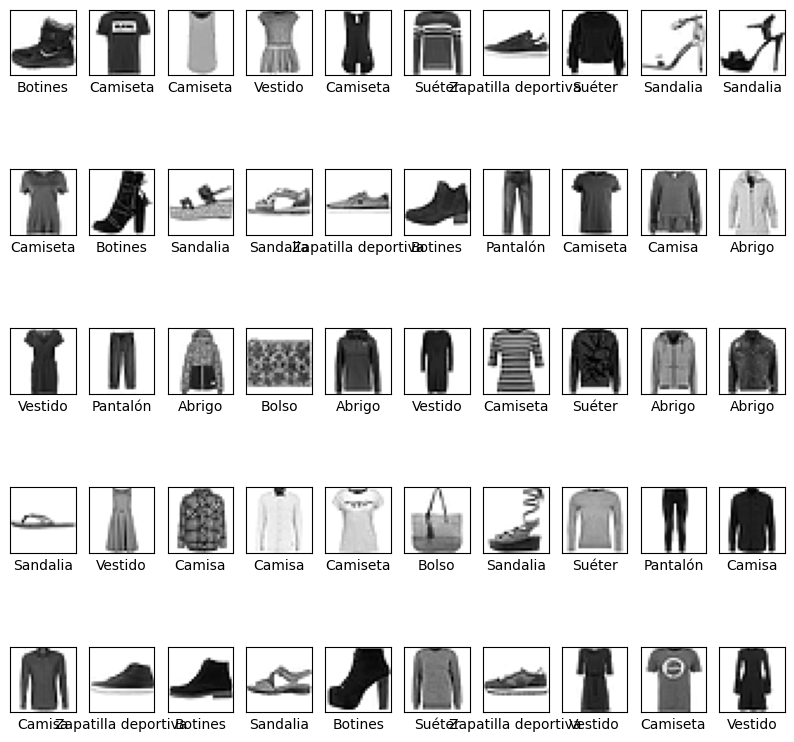

In [22]:
# 3. Descripción de la base de datos


# 3.1. Cantidad de registros
print("Cantidad de registros de entrenamiento: ", len(train_images))
print("Cantidad de registros de prueba: ", len(test_images))

# 3.2. Cantidad de atributos
print("Cantidad de atributos: ", train_images.shape)

# 3.3. Tipo de datos de los atributos
print("Tipo de datos de los atributos: ", train_images.dtype)

# 3.4. Tipo de datos de las etiquetas
print("Tipo de datos de las etiquetas: ", train_labels.dtype)

# 3.5. Valores únicos de las etiquetas
print("Valores únicos de las etiquetas: ", np.unique(train_labels))

print("Cantidad de imágenes para entrenamiento: ", len(train_images))
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [23]:
# 4. Configuración de la red neuronal

# 4.1. Normalización de los datos


train_images = train_images / 255.0 
test_images = test_images / 255.0


# Nota Importante: 
# train_images se divide entre 255.0 para que los valores estén entre 0 y 1.
# Hacer esto hace que sea más fácil para la red neuronal aprender.


# 4.2. Definición de la red neuronal

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Capa de entrada Flatten => aplanar 28x28 = 784
    keras.layers.Dense(150, activation="relu"), # Capa oculta
    keras.layers.Dense(10, activation="softmax") # Capa de salida
])






In [24]:
# 5. Compilación de la red neuronal

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"]
)

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 150)               117750    
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 6. Entrenamiento de la red

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)



Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5128 - accuracy: 0.8196 - val_loss: 0.4350 - val_accuracy: 0.8420
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3834 - accuracy: 0.8614 - val_loss: 0.3811 - val_accuracy: 0.8639
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3444 - accuracy: 0.8731 - val_loss: 0.3680 - val_accuracy: 0.8652
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3172 - accuracy: 0.8826 - val_loss: 0.3458 - val_accuracy: 0.8712
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2982 - accuracy: 0.8892 - val_loss: 0.3347 - val_accuracy: 0.8822
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2831 - accuracy: 0.8947 - val_loss: 0.3408 - val_accuracy: 0.8792
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2679 - accuracy: 0.9003 - val_loss: 0.3199 - val_accuracy:

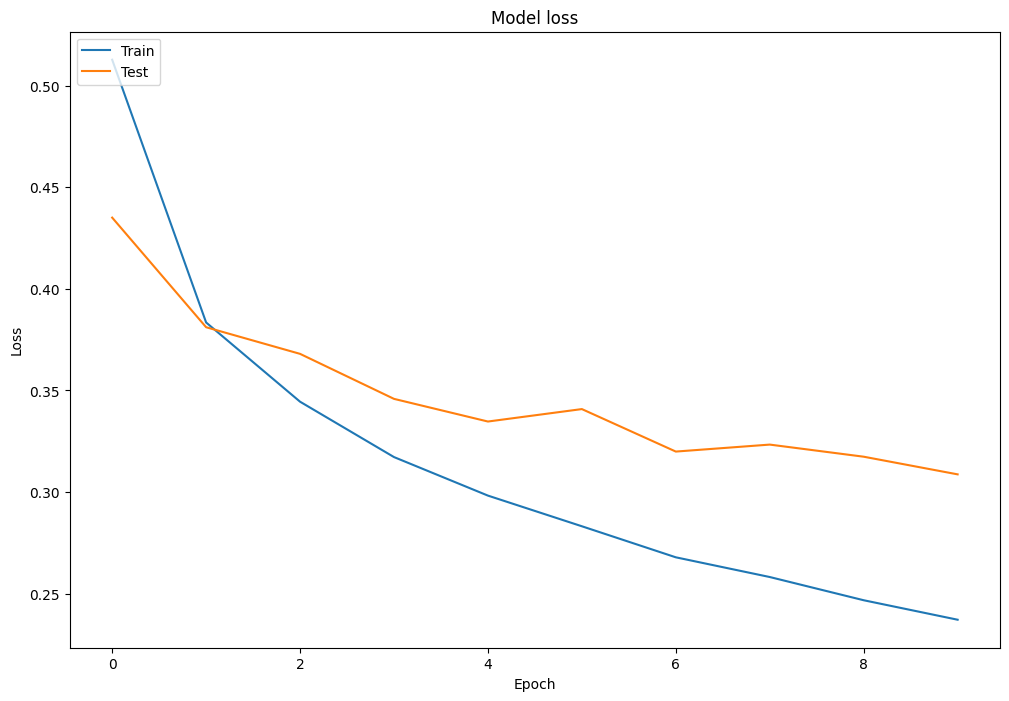

In [26]:
# graficar la pérdida

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(history.history['loss'], label='Train')
ax.plot(history.history['val_loss'], label='Test')
ax.set_title('Model loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(loc='upper left')
plt.show()


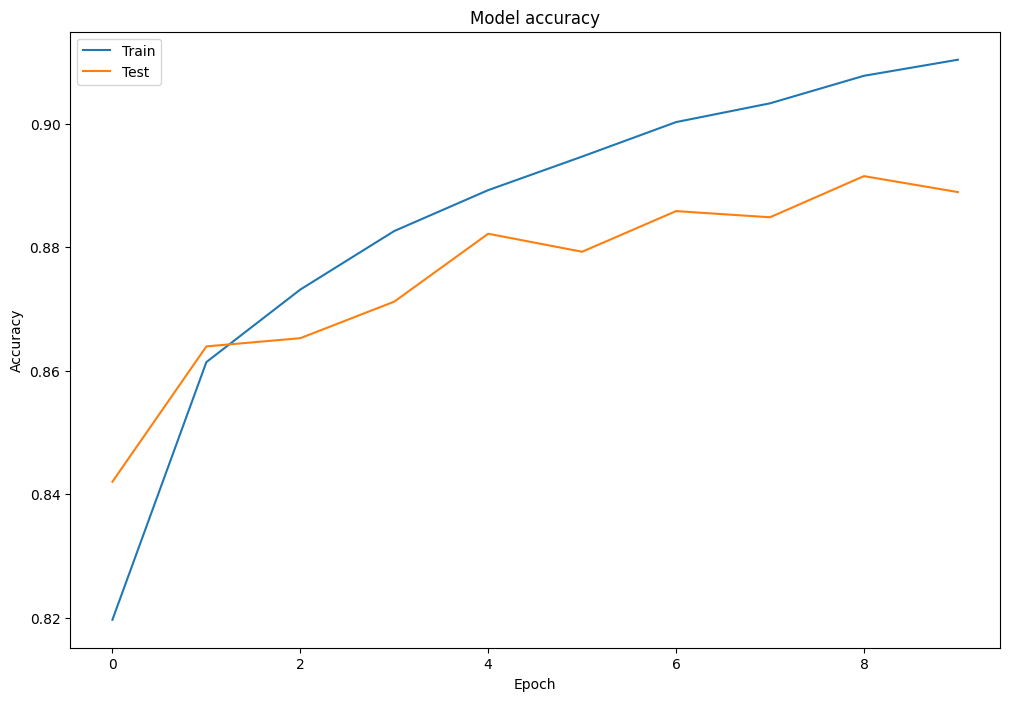

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(history.history['accuracy'], label='Train')
ax.plot(history.history['val_accuracy'], label='Test')
ax.set_title('Model accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(loc='upper left')

In [28]:
# 7. Predicción y conclusión.

# Evaluación de la red neuronal
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1) # verbose=1 para que muestre el progreso
print("Precisión de la red neuronal: ", test_acc)

# Predicción de la red neuronal
predictions = model.predict(test_images)
print("Predicción de la red neuronal: ", np.argmax(predictions[0]))



313/313 [==============================] - 1s 3ms/step - loss: 0.3333 - accuracy: 0.8808
Precisión de la red neuronal:  0.8808000087738037
313/313 [==============================] - 1s 3ms/step
Predicción de la red neuronal:  9


In [29]:
img_predict = predictions[30]

img_predict =predictions[30]
print(img_predict)

[8.53027926e-10 3.69049463e-13 1.69718935e-13 1.49178380e-12
 8.19976240e-11 1.07964674e-14 6.33881375e-14 3.50280305e-10
 1.00000000e+00 4.72315926e-13]


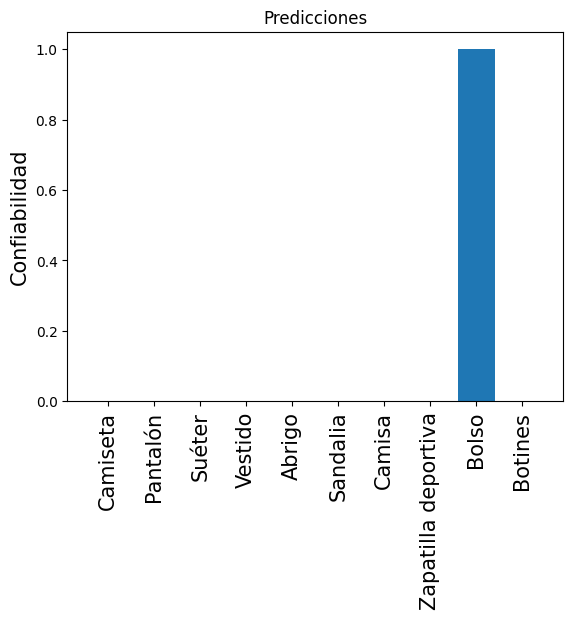

In [30]:
index = np.arange(len(class_names))
plt.bar(index, img_predict)
plt.ylabel("Confiabilidad", fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title("Predicciones")
plt.show()

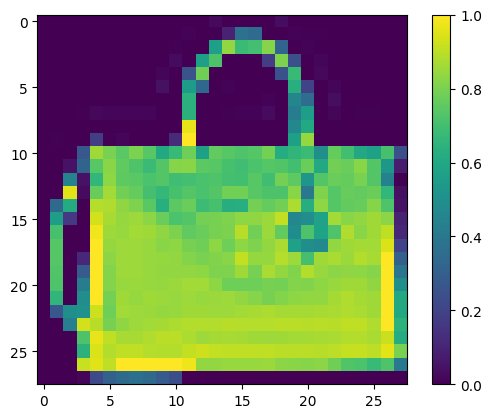

In [31]:
# Visualización de la predicción
plt.figure()
plt.imshow(test_images[30])
plt.colorbar()
plt.grid(False)
plt.show()

In [32]:
# - Redes neuronales en Python

# R: Las redes neuronales son un conjunto de algoritmos que intentan identificar
# patrones en los datos. Estos algoritmos están diseñados para reconocer
# patrones directamente de los datos o características de los datos. Su nombre
# y estructura se inspiran en el cerebro humano, específicamente en las
# neuronas que componen el cerebro humano.

# - Problemas de clasificación
# R: Los problemas de clasificación son aquellos en los que se tiene que
# predecir una variable categórica, es decir, una variable que puede tomar
# valores de un conjunto de categorías. Por ejemplo, predecir si un correo
# electrónico es spam o no, o predecir si un tumor es maligno o benigno.


# - Clasificación con redes neuronales
# R: La clasificación con redes neuronales es un tipo de clasificación que
# utiliza redes neuronales para predecir la clase de un conjunto de datos.
# Las redes neuronales son un conjunto de algoritmos que intentan identificar
# patrones en los datos. Estos algoritmos están diseñados para reconocer
# patrones directamente de los datos o características de los datos. Su nombre
# y estructura se inspiran en el cerebro humano, específicamente en las
# neuronas que componen el cerebro humano.


